# Problem 1

A company selling batteries claims that the average life for its batteries before a recharge is necessary is at least 100 hours. The data is in the file batteries.csv. One of its clients wanted to verify this claim by testing 48 batteries as described in the Figure 1. Is the company’s claim correct at the alpha=5% level?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind

In [2]:
batteries = pd.read_csv("batteries.csv", header=None)
batteries.columns = ['battery_life']

In [3]:
batteries.head(5)

,battery_life
0,137.0
1,73.0
2,99.0
3,113.0
4,96.0


H0 = Average battery life is at least 100 hours
H(alt) = Average battery life is less than 100 hours

n = 48
alpha = 0.05

In [4]:
# Calculate the mean and the standard deviation of the sample
mean = np.mean(batteries['battery_life'])
std = np.std(batteries['battery_life'], ddof=1)
print(mean)
print(std)

103.8125
23.958879888924585


In [5]:
# Compute the cutoff for the null hypothesis of mean = 100

# if the sample mean is above the cutoff, reject the null.
# if the sample mean is below the cutoff, fail to reject the null.

std_error = std/math.sqrt(48)
cutoff = stats.norm.ppf(.95,loc=100, scale=std_error)
cutoff

105.68817760870233

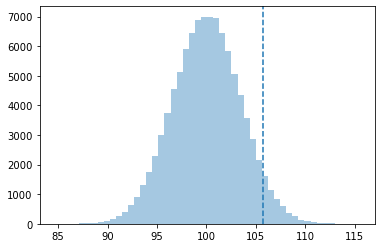

In [6]:
r = stats.norm.rvs(loc=100, scale=std_error, size=100000)

plt.axvline(cutoff, 0,1, linestyle='--')
sns.distplot(r, kde=False)

In [7]:
print(f'since mean = {mean} < {cutoff}, fail to reject the null hypothesis!!')

since mean = 103.8125 < 105.68817760870233, fail to reject the null hypothesis!!


In [8]:
stats.ttest_1samp(batteries, 100)

Ttest_1sampResult(statistic=array([1.10246284]), pvalue=array([0.27587391]))

Fail to reject null hypothesis

# Problem 2

The file mpg.csv has sample data on the miles per gallon from various US and Japanese cars
Test the null hypothesis that the population of US cars has the same MPG as the population of Japanese at the 5% level.

In [9]:
mpg = pd.read_csv("mpg.csv")

In [10]:
mpg

,American Car MPG,Japanese Cars MPG
0,18,24
1,15,27
2,18,27
3,16,25
4,17,31
...,...,...
244,27,-999
245,27,-999
246,32,-999
247,28,-999


Null Hypothesis: MPG of US Cars = MPG of Japanese cars

Alternative Hypothesis: US MPG != Japanese MPG

In [11]:
mpg.drop(mpg[mpg['Japanese Cars MPG'] == -999].index, inplace = True) 

In [12]:
mpg

,American Car MPG,Japanese Cars MPG
0,18,24
1,15,27
2,18,27
3,16,25
4,17,31
...,...,...
74,18,34
75,18,38
76,23,32
77,11,38


In [13]:
mpg.mean()

American Car MPG     16.025316
Japanese Cars MPG    30.481013
dtype: float64

In [14]:
mpg.std()

American Car MPG     4.196991
Japanese Cars MPG    6.107710
dtype: float64

In [15]:
american = mpg['American Car MPG'].mean()
japanese = mpg['Japanese Cars MPG'].mean()

In [16]:
ttest,pval = ttest_ind(mpg['American Car MPG'],mpg['Japanese Cars MPG'])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 3.267637437870519e-38
we reject null hypothesis


ValueError: Domain error in arguments.

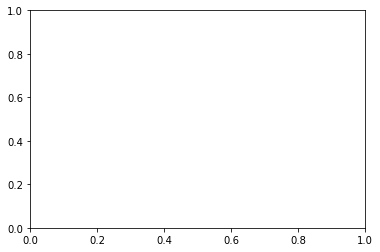

In [17]:
df = 1 - len(mpg)
alpha = 0.05
cutoff = stats.t.ppf(1 - alpha, df=df)
plt.axvline(cutoff,0,1)
sns.distplot(stats.t.rvs(df=df, size=400000), kde=False)

# Problem 3

The file sat.csv has various data
High school math grades (HSM)
High school science grades (HSS)
High school English grades (HSE)
SAT Math (SATM)
SAT Verbal (SATV)
Gender unknown which is male or female

Run a bunch of tests! do gender 1 and gender 2 have the same population means for HSM, HSE, SATM, and SATV?

In [ ]:
sat = pd.read_csv("sat.csv")

In [ ]:
sat.head(5)

In [ ]:
gender1 = sat.loc[sat['sex'] == 1]
gender2 = sat.loc[sat['sex'] == 2]

In [ ]:
gender1.mean()

In [ ]:
gender2.mean()

In [ ]:
stats.ttest_ind(gender1['hsm'],gender2['hsm'], equal_var=False)

Reject null hypothesis that hsm is the same for gender1 and gender2

In [ ]:
stats.ttest_ind(gender1['hse'],gender2['hse'], equal_var=False)

Reject null hypothesis that hse is the same for gender1 and gender2

In [ ]:
stats.ttest_ind(gender1['satm'],gender2['satm'], equal_var=False)

Reject null hypothesis that satm is the same for gender1 and gender2

In [ ]:
stats.ttest_ind(gender1['satv'],gender2['satv'], equal_var=False)

Fail to reject null hypothesis that satv is the same for gender1 and gender2

In [ ]:
sat['total'] = sat['satm']+sat['satv']

In [ ]:
sat

In [ ]:
stats.ttest_ind(gender1['total'],gender2['total'], equal_var=False)